In [1]:
import json
import pandas as pd

from datetime import datetime
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [2]:
# Query parameters
k = 10000
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [3]:
# Ranker 1. Return all documents and order by id

res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(listing_url)s %(last_scraped)s %(name)s: %(overall_rating)s" % hit["_source"])

Got 10000 Hits:
1.0  https://www.airbnb.com/rooms/4196643 20180817 3 Bed Condo Near Convention Center & Subway (16L2): 4.5
1.0  https://www.airbnb.com/rooms/4216208 20180817 2 bedroom close to public transit: 4.5
1.0  https://www.airbnb.com/rooms/4223387 20180817 Convenient green Victorian: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4233242 20180817 Quiet Artist's Retreat: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4255538 20180817 Theater District 1BR 1Bath Cityview: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4262255 20180817 Beautiful and sunny condo: 5.0
1.0  https://www.airbnb.com/rooms/4263736 20180817 Brownstone Master Bath Suite Park Garden View by T: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4275846 20180817 Boston Studio Across from Majestic Theater: 4.416666666666667
1.0  https://www.airbnb.com/rooms/4278067 20180817 Studio apart Tremont St South End #2: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4287989 20180817 One bedroom Condo

1.0  https://www.airbnb.com/rooms/9591772 20180817 Jamaica Plain condo, great location: 5.0
1.0  https://www.airbnb.com/rooms/9593141 20180817 Private Room - Conveniently Located to Harvard Sq: 5.0
1.0  https://www.airbnb.com/rooms/9614024 20180817 Beautiful Studio Apt- Symphony area: 4.416666666666667
1.0  https://www.airbnb.com/rooms/9626428 20180817 South Boston Condo: 5.0
1.0  https://www.airbnb.com/rooms/9677207 20180817 Beautiful Brownstone near Copley Sq: 4.833333333333333
1.0  https://www.airbnb.com/rooms/9685076 20180817 Awesome Room with AirBed: 4.583333333333333
1.0  https://www.airbnb.com/rooms/9685085 20180817 Boston Private Room with AirBed Near T!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/9685102 20180817 Spacious room in two-room condo in Boston MA: 5.0
1.0  https://www.airbnb.com/rooms/9709597 20180817 Marriott Custom House - Marathon Wk: 4.75
1.0  https://www.airbnb.com/rooms/9731479 20180817 Penthouse South End with roof deck: 4.916666666666667
1.0  https:

1.0  https://www.airbnb.com/rooms/12291029 20180817 Back Bay 1  Bedroom - Charles River: 4.75
1.0  https://www.airbnb.com/rooms/12308161 20180817 Cozy Boston Brownstone, Convenient Area, Easy MBTA: 5.0
1.0  https://www.airbnb.com/rooms/12308927 20180817 1 Cozy Room 3mins walk to Train, 7mins to Airport: 5.0
1.0  https://www.airbnb.com/rooms/12318093 20180817 Charming South End Apartment: 4.583333333333333
1.0  https://www.airbnb.com/rooms/12320063 20180817 room in beautiful house: 4.75
1.0  https://www.airbnb.com/rooms/12336281 20180817 Spacious loft in the quiet suburbs #3: 4.583333333333333
1.0  https://www.airbnb.com/rooms/12343588 20180817 Cozy 3 Bedroom, 1 Bath, 1st Floor: 4.833333333333333
1.0  https://www.airbnb.com/rooms/12343708 20180817 Walk/Bus to Redline Renovated Easy to MIT/Harvard: 4.75
1.0  https://www.airbnb.com/rooms/12344014 20180817 Sun-Drenched Loft: 4.5
1.0  https://www.airbnb.com/rooms/12344142 20180817 Top Rated Apartment! Exceptional Location!: 4.91666666666666

1.0  https://www.airbnb.com/rooms/15022444 20180817 Boston Vacation Rental-2 M373-2: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15026535 20180817 3. NEW Condo, with a VIEW! Downtown 6 stops away!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/15038186 20180817 Room For The Whole Family, 2 Townhouses, Sleeps 8: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15038991 20180817 Spacious 1BR Apt in Financial Dist: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15041272 20180817 HUGE 5BR/3B apartment 10 min from subway!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15041925 20180817 Large Private bedroom w ensuite,Walk to Charles!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15043894 20180817 Boston Furnished Rentals 2A: 4.75
1.0  https://www.airbnb.com/rooms/15044173 20180817 Boston Furnished Rentals 4B: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15047711 20180817 The Green Nest: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15048978 20

1.0  https://www.airbnb.com/rooms/18829493 20180817 Comfortable 3rd floor apartment,closed to Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18834586 20180817 Cozy Relaxing 2 Bed 2.5 Bath Townhouse: 5.0
1.0  https://www.airbnb.com/rooms/18837576 20180817 Duplex with Great City Views: 4.75
1.0  https://www.airbnb.com/rooms/18840936 20180817 Cozy Room 3: 4.666666666666667
1.0  https://www.airbnb.com/rooms/18841034 20180817 Cozy Room: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18841072 20180817 Cozy Room 2: 4.583333333333333
1.0  https://www.airbnb.com/rooms/18841628 20180817 Amazing Location! 2-Bedroom Apt. in Beacon Hill: 5.0
1.0  https://www.airbnb.com/rooms/18842481 20180817 Beautiful 1 BR apartment in Bay Village: 2.8333333333333335
1.0  https://www.airbnb.com/rooms/18848342 20180817 Large Bed in Gorgeous Apt Close to Transportation: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18857626 20180817 Open condo room available: 4.666666666666667
1.0  https://ww

1.0  https://www.airbnb.com/rooms/21548228 20180817 Sleek 2BR in Downtown Crossing by Sonder: 4.75
1.0  https://www.airbnb.com/rooms/21548729 20180817 Cosy Private Room in University Area: 4.083333333333333
1.0  https://www.airbnb.com/rooms/21548957 20180817 QUIET SUNNY 1BR LOCATION, CHARM and CONVENIENCE: 5.0
1.0  https://www.airbnb.com/rooms/21550485 20180817 Large studio space, private entrance and walk to T: 5.0
1.0  https://www.airbnb.com/rooms/21551519 20180817 Sea Green Room!: 5.0
1.0  https://www.airbnb.com/rooms/21554511 20180817 3bdrm next to Airport and Downtown!: 5.0
1.0  https://www.airbnb.com/rooms/21559343 20180817 2 bed apartment near Airport and Downtown.: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21562776 20180817 Wondrous Back Bay Condo!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21563331 20180817 HUGE Beacon Hill studio with lots of CHARM!!!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/21565906 20180817 #1. Private Room Near Fenway & Long

1.0  https://www.airbnb.com/rooms/24300286 20180817 Cozy Private Bedroom: 5.0
1.0  https://www.airbnb.com/rooms/24300650 20180817 Private Bedroom in South End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/24302130 20180817 Boston Marathon: 2BR Apt in Quaint Southend!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/24307072 20180817 (211-B2) Fenway Park, 3 bed!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/24310492 20180817 Steps to Train in Hip Jamaica Plain - Boston: 5.0
1.0  https://www.airbnb.com/rooms/24312147 20180817 Bright & modern w private ½ bath, AC, easy parking: 4.916666666666667
1.0  https://www.airbnb.com/rooms/24315639 20180817 Beautiful Cozy Apartment | Minutes to Downtown: 4.833333333333333
1.0  https://www.airbnb.com/rooms/24324506 20180817 Cozy Comfortable Travel Pad!: 4.583333333333333
1.0  https://www.airbnb.com/rooms/24325336 20180817 On Beacon Hill Studio -Walk to Mass General: 4.75
1.0  https://www.airbnb.com/rooms/24328144 20180817 Flexible r

1.0  https://www.airbnb.com/rooms/20888247 20171006 Rm#2: 5min walk to T-metro to Boston\Cambridge: 4.833333333333333
1.0  https://www.airbnb.com/rooms/7708436 20171006 Your own bedroom, sitting room & bathroom. Near T.: 5.0
1.0  https://www.airbnb.com/rooms/14071446 20171006 Twins in a peaceful room.: 5.0
1.0  https://www.airbnb.com/rooms/4765070 20171006 Private studio w/ private entrance: 4.75
1.0  https://www.airbnb.com/rooms/18955871 20171006 Bright cozy and spacious- surrounded by green!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/16119921 20171006 White Room / 2 Min Walk to Subway!: 4.25
1.0  https://www.airbnb.com/rooms/19346178 20171006 Your Home Away from Home in JP: 4.833333333333333
1.0  https://www.airbnb.com/rooms/13344433 20171006 Sun filled modern master suite and separate den: 5.0
1.0  https://www.airbnb.com/rooms/5652147 20171006 Convenient, Sunny 3b/2bth w/Parking: 4.5
1.0  https://www.airbnb.com/rooms/13865867 20171006 Large Arts & Crafts style Jamaica Plai

1.0  https://www.airbnb.com/rooms/14418787 20171006 Private third floor walk-up: Room 1: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18789496 20171006 Private Space: 4.583333333333333
1.0  https://www.airbnb.com/rooms/18473519 20171006 Spacious and Convenient: 4.833333333333333
1.0  https://www.airbnb.com/rooms/8442154 20171006 Gem in the City: 4.75
1.0  https://www.airbnb.com/rooms/13422887 20171006 Small Room, Off-St. Parking, AC, Renovated Clean: 5.0
1.0  https://www.airbnb.com/rooms/5726867 20171006 Cozy third floor apartment.: 4.416666666666667
1.0  https://www.airbnb.com/rooms/4263736 20171006 Brownstone Master Bedroom Suite: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6819620 20171006 Renovated Parking EZ to downtown: 4.5
1.0  https://www.airbnb.com/rooms/69369 20171006 Room in Boston off the beaten path: 4.583333333333333
1.0  https://www.airbnb.com/rooms/349347 20171006 Modern Studio on Tremont St - #2: 4.5
1.0  https://www.airbnb.com/rooms/18893583 20171006 Mo

1.0  https://www.airbnb.com/rooms/16106701 20171006 Brownstone Studio, Perfect Location!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/9231486 20171006 Large 2 BR|2 BA + Patio in Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/6921241 20171006 1 BR on Newbury St: 5.0
1.0  https://www.airbnb.com/rooms/15989113 20171006 One Bedroom Apartment in Back Bay - (47M#4): 4.25
1.0  https://www.airbnb.com/rooms/19553261 20171006 Prime Back Bay Location Loft, 2 min. to Newbury St: 5.0
1.0  https://www.airbnb.com/rooms/14572499 20171006 Stylish One Bedroom in Boston Brownstone: 4.833333333333333
1.0  https://www.airbnb.com/rooms/19504080 20171006 Stunning Newbury Street Apartment: 5.0
1.0  https://www.airbnb.com/rooms/17734408 20171006 Heart of Boston's Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/13032174 20171006 1 BR Heaven on Newbury St. in Lux Building: 5.0
1.0  https://www.airbnb.com/rooms/3463914 20171006 4th of July Dream Spot!: 4.5
1.0  https://www.airbnb.com/rooms/13327413 20171

1.0  https://www.airbnb.com/rooms/5241043 20171006 Beacon Hill room in Boston proper: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4461613 20171006 Charming & Stylish Studio on Beacon Hill #13: 4.916666666666667
1.0  https://www.airbnb.com/rooms/10311094 20171006 New Beacon Back Bay Great 3BR 3 Bath Penthouse Apt: 4.333333333333333
1.0  https://www.airbnb.com/rooms/14111670 20171006 NEW MANAGEMENT DISCOUNT 2BD Beacon Hill: 4.583333333333333
1.0  https://www.airbnb.com/rooms/17774119 20171006 Walk to T - 2 Bedrooms in Peaceful Beacon Hill: 4.75
1.0  https://www.airbnb.com/rooms/19308245 20171006 Majestic Charles St. Beacon Hill Studio - #9: 4.0
1.0  https://www.airbnb.com/rooms/15281975 20171006 Cozy studio in the heart of Beacon Hill: 4.833333333333333
1.0  https://www.airbnb.com/rooms/14025410 20171006 Beacon Hill private studio, near Charles St.: 5.0
1.0  https://www.airbnb.com/rooms/19415743 20171006 Simple Beacon Hill Studio LOW SAME NIGHT PRICES!12: 4.75
1.0  https://www.ai

1.0  https://www.airbnb.com/rooms/11662212 20171006 A Suburban Room in Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4530670 20171006 West Roxbury (Boston) private room: 5.0
1.0  https://www.airbnb.com/rooms/13261681 20171006 Private Room w/ Two Queen Comfortable Beds: 4.666666666666667
1.0  https://www.airbnb.com/rooms/20980209 20171006 Modern private room upscale area nr Boston College: 5.0
1.0  https://www.airbnb.com/rooms/1161210 20171006 Cozy rooms with parking and Wi-Fi 舒适的睡房并带免费停车和上网: 4.666666666666667
1.0  https://www.airbnb.com/rooms/6261296 20171006 Free parking, 2 private rooms: 4.916666666666667
1.0  https://www.airbnb.com/rooms/17652172 20171006 Cozy bedroom quite place: 4.916666666666667
1.0  https://www.airbnb.com/rooms/16441976 20171006 Boston, Entire private renovated 2BR/2Bath/New AC: 4.666666666666667
1.0  https://www.airbnb.com/rooms/20035218 20171006 Affordable room in quiet neighborhood: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18307286 20

1.0  https://www.airbnb.com/rooms/10758 20171006 Budget Single - share bath: 3.5
1.0  https://www.airbnb.com/rooms/6277566 20171006 10 Min Walk to HBS and Harvard Sq: 3.8333333333333335
1.0  https://www.airbnb.com/rooms/19328724 20171006 Sunny Private Bedroom in Boston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/13450030 20171006 Allston, Close to Harvard Business School + BU I: 4.666666666666667
1.0  https://www.airbnb.com/rooms/19593942 20171006 Quiet home: 4.75
1.0  https://www.airbnb.com/rooms/7395978 20171006 Private Bedroom/Bathroom! Allston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/13515084 20171006 Allston, Close to Harvard Business School + BU F: 4.75
1.0  https://www.airbnb.com/rooms/14153636 20171006 King Zen Room near Harvard Business School: 4.916666666666667
1.0  https://www.airbnb.com/rooms/10807 20171006 Budget Double - share bath : 3.3333333333333335
1.0  https://www.airbnb.com/rooms/14203428 20171006 Smiling Buddha Bedroom near Harvard: 4.916666666

1.0  https://www.airbnb.com/rooms/4364925 20180718 large & grand 2 bedroom South End by Copley Sq #3: 5.0
1.0  https://www.airbnb.com/rooms/4364989 20180718 newly furn one bedroom by Copley #6: 5.0
1.0  https://www.airbnb.com/rooms/4377247 20180718 Perfect Back Bay 1BR; Walk the City: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4387413 20180718 Sunny Room next to Harvard Yard: 5.0
1.0  https://www.airbnb.com/rooms/4402259 20180718 Large Studio w/ private patio!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4405982 20180718 Luxury Apt near Restaurants&Pond&T: 5.0
1.0  https://www.airbnb.com/rooms/4410142 20180718 Best Location in Boston (Copley Sq): 4.666666666666667
1.0  https://www.airbnb.com/rooms/4410765 20180718 Great Location & Value.Large 3 Bed,Min stay 2 mos.: 4.5
1.0  https://www.airbnb.com/rooms/4430821 20180718 Cheery skylit room w/ Queen bed: 4.75
1.0  https://www.airbnb.com/rooms/4431210 20180718 Umass, MGH, City,BCEC,Longwood 3B: 4.25
1.0  https://www.airbnb

1.0  https://www.airbnb.com/rooms/9897713 20180718 Warm 1 Bedroom Near Airport: 4.75
1.0  https://www.airbnb.com/rooms/9900315 20180718 Uncommon Place (free parking!): 4.833333333333333
1.0  https://www.airbnb.com/rooms/9918713 20180718 Lavish 2-BR Back Bay Apartment: 4.25
1.0  https://www.airbnb.com/rooms/9920084 20180718 -Luxury Furnished 2BR Apartment Near South End: 4.25
1.0  https://www.airbnb.com/rooms/9922595 20180718 Downtown Boston 1-BR Apt. Near Boston Commons!: 5.0
1.0  https://www.airbnb.com/rooms/9949819 20180718 South End Near Backbay Garden Apt: 5.0
1.0  https://www.airbnb.com/rooms/9953144 20180718 Private room near Boston University for one: 4.833333333333333
1.0  https://www.airbnb.com/rooms/9970895 20180718 South End-Close to Everything!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/9971054 20180718 Cozy Room In JP: 4.833333333333333
1.0  https://www.airbnb.com/rooms/9971676 20180718 Kendall Square 2 Bedroom Apartment: 5.0
1.0  https://www.airbnb.com/rooms/999

In [4]:
res

{'took': 104,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'airbnb_history_boston',
    '_type': 'doc',
    '_id': 'YGHfKncBYxiStLCpJemn',
    '_score': 1.0,
    '_source': {'id': 4196643,
     'listing_url': 'https://www.airbnb.com/rooms/4196643',
     'scrape_id': 20180817025537,
     'last_scraped': '20180817',
     'name': '3 Bed Condo Near Convention Center & Subway (16L2)',
     'host_id': 3594203,
     'price': 99.0,
     'availability_30': 5,
     'availability_60': 13,
     'availability_90': 19,
     'availability_365': 106,
     'number_of_reviews': 142,
     'first_review': '20140928',
     'last_review': '20180731',
     'review_scores_rating': 86.0,
     'review_scores_accuracy': 9.0,
     'review_scores_cleanliness': 9.0,
     'review_scores_checkin': 10.0,
     'review_scores_communication': 10.0,
     'review_scores_location': 

In [5]:
type(res)

dict

In [6]:
pd.DataFrame.from_dict(res, orient='index')

,0
took,104
timed_out,False
_shards,"{'total': 1, 'successful': 1, 'skipped': 0, 'f..."
hits,"{'total': {'value': 10000, 'relation': 'gte'},..."


In [7]:
df = pd.json_normalize(res['hits']['hits'])

In [8]:
df

,_index,_type,_id,_score,_source.id,_source.listing_url,_source.scrape_id,_source.last_scraped,_source.name,_source.host_id,...,_source.first_review,_source.last_review,_source.review_scores_rating,_source.review_scores_accuracy,_source.review_scores_cleanliness,_source.review_scores_checkin,_source.review_scores_communication,_source.review_scores_location,_source.review_scores_value,_source.overall_rating
0,airbnb_history_boston,doc,YGHfKncBYxiStLCpJemn,1.0,4196643,https://www.airbnb.com/rooms/4196643,20180817025537,20180817,3 Bed Condo Near Convention Center & Subway (1...,3594203,...,20140928,20180731,86.0,9.0,9.0,10.0,10.0,8.0,8.0,4.500000
1,airbnb_history_boston,doc,YWHfKncBYxiStLCpJemn,1.0,4216208,https://www.airbnb.com/rooms/4216208,20180817025537,20180817,2 bedroom close to public transit,10663539,...,20150421,20180724,86.0,9.0,8.0,10.0,10.0,8.0,9.0,4.500000
2,airbnb_history_boston,doc,YmHfKncBYxiStLCpJemn,1.0,4223387,https://www.airbnb.com/rooms/4223387,20180817025537,20180817,Convenient green Victorian,5689782,...,20141004,20171105,92.0,10.0,10.0,10.0,10.0,9.0,9.0,4.833333
3,airbnb_history_boston,doc,Y2HfKncBYxiStLCpJemn,1.0,4233242,https://www.airbnb.com/rooms/4233242,20180817025537,20180817,Quiet Artist's Retreat,197327,...,20141005,20180730,93.0,10.0,9.0,10.0,10.0,10.0,9.0,4.833333
4,airbnb_history_boston,doc,ZGHfKncBYxiStLCpJemn,1.0,4255538,https://www.airbnb.com/rooms/4255538,20180817025537,20180817,Theater District 1BR 1Bath Cityview,11279983,...,20141026,20180730,99.0,10.0,10.0,10.0,10.0,10.0,9.0,4.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,airbnb_history_boston,doc,wWHfKncBYxiStLCpFduK,1.0,13907214,https://www.airbnb.com/rooms/13907214,20180718194756,20180718,Cozy sweet room in Boston 波士顿精美单人房间,61588005,...,20160813,20160813,100.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
9996,airbnb_history_boston,doc,wmHfKncBYxiStLCpFduK,1.0,13908031,https://www.airbnb.com/rooms/13908031,20180718194756,20180718,"Modern Room, Private Bath near airport & city",5997103,...,20160714,20180716,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5.000000
9997,airbnb_history_boston,doc,w2HfKncBYxiStLCpFduK,1.0,13912429,https://www.airbnb.com/rooms/13912429,20180718194756,20180718,Marriott Custom House,18117392,...,20160818,20160909,100.0,9.0,9.0,10.0,10.0,10.0,10.0,4.833333
9998,airbnb_history_boston,doc,xGHfKncBYxiStLCpFduK,1.0,13912467,https://www.airbnb.com/rooms/13912467,20180718194756,20180718,14 Gloucester Street Apartment 3A,82529160,...,20160721,20180404,93.0,9.0,10.0,10.0,10.0,10.0,9.0,4.833333


In [9]:
len(df)

10000

In [10]:
df['_source.last_scraped'].value_counts().sort_index(ascending=True)

20171006    3923
20180718    1773
20180817    4304
Name: _source.last_scraped, dtype: int64

/Users/nattiya/miniconda3/envs/dl/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'date')

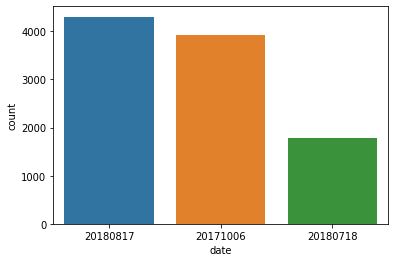

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['_source.last_scraped'])
plt.xlabel('date')

# Analyze All Document Distribution over Time

In [12]:
from elasticsearch.helpers import scan

res = scan(
    es,
    index=index_name,
    query={"query": { "match_all" : {}}}
)

In [13]:
data = list(res)

In [14]:
len(data)

128172

In [15]:
data[0]

{'_index': 'airbnb_history_boston',
 '_type': 'doc',
 '_id': 'YGHfKncBYxiStLCpJemn',
 '_score': None,
 '_source': {'id': 4196643,
  'listing_url': 'https://www.airbnb.com/rooms/4196643',
  'scrape_id': 20180817025537,
  'last_scraped': '20180817',
  'name': '3 Bed Condo Near Convention Center & Subway (16L2)',
  'host_id': 3594203,
  'price': 99.0,
  'availability_30': 5,
  'availability_60': 13,
  'availability_90': 19,
  'availability_365': 106,
  'number_of_reviews': 142,
  'first_review': '20140928',
  'last_review': '20180731',
  'review_scores_rating': 86.0,
  'review_scores_accuracy': 9.0,
  'review_scores_cleanliness': 9.0,
  'review_scores_checkin': 10.0,
  'review_scores_communication': 10.0,
  'review_scores_location': 8.0,
  'review_scores_value': 8.0,
  'overall_rating': 4.5},
 'sort': [0]}

In [16]:

# appending rows 
docs = []
for item in data:  
    doc = {
        'id': item['_id'],
        'index': item['_index'],
        'listing_url': item['_source']['listing_url'],
        'scrape_id': item['_source']['scrape_id'],
        'last_scraped': item['_source']['last_scraped'],
        'name': item['_source']['name'],
        'host_id': item['_source']['host_id'],
        'price': item['_source']['price'],
        'availability_30': item['_source']['availability_30'],
        'availability_60': item['_source']['availability_60'],
        'availability_90': item['_source']['availability_90'],
        'availability_365': item['_source']['availability_365'],
        'first_review': item['_source']['first_review'],
        'last_review': item['_source']['last_review'],
        'review_scores_rating': item['_source']['review_scores_rating'],
        'review_scores_accuracy': item['_source']['review_scores_accuracy'],
        'review_scores_cleanliness': item['_source']['review_scores_cleanliness'],
        'review_scores_checkin': item['_source']['review_scores_checkin'],
        'review_scores_communication': item['_source']['review_scores_communication'],
        'review_scores_location': item['_source']['review_scores_location'],
        'review_scores_value': item['_source']['review_scores_value'],
        'overall_rating': item['_source']['overall_rating']
    }
    
    docs.append(doc) 

In [17]:
df = pd.DataFrame(docs)

In [18]:
df.head()

,id,index,listing_url,scrape_id,last_scraped,name,host_id,price,availability_30,availability_60,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,overall_rating
0,YGHfKncBYxiStLCpJemn,airbnb_history_boston,https://www.airbnb.com/rooms/4196643,20180817025537,20180817,3 Bed Condo Near Convention Center & Subway (1...,3594203,99.0,5,13,...,20140928,20180731,86.0,9.0,9.0,10.0,10.0,8.0,8.0,4.500000
1,YWHfKncBYxiStLCpJemn,airbnb_history_boston,https://www.airbnb.com/rooms/4216208,20180817025537,20180817,2 bedroom close to public transit,10663539,89.0,9,36,...,20150421,20180724,86.0,9.0,8.0,10.0,10.0,8.0,9.0,4.500000
2,YmHfKncBYxiStLCpJemn,airbnb_history_boston,https://www.airbnb.com/rooms/4223387,20180817025537,20180817,Convenient green Victorian,5689782,75.0,8,30,...,20141004,20171105,92.0,10.0,10.0,10.0,10.0,9.0,9.0,4.833333
3,Y2HfKncBYxiStLCpJemn,airbnb_history_boston,https://www.airbnb.com/rooms/4233242,20180817025537,20180817,Quiet Artist's Retreat,197327,98.0,0,0,...,20141005,20180730,93.0,10.0,9.0,10.0,10.0,10.0,9.0,4.833333
4,ZGHfKncBYxiStLCpJemn,airbnb_history_boston,https://www.airbnb.com/rooms/4255538,20180817025537,20180817,Theater District 1BR 1Bath Cityview,11279983,232.0,30,44,...,20141026,20180730,99.0,10.0,10.0,10.0,10.0,10.0,9.0,4.916667


In [19]:
df.shape

(128172, 22)

In [20]:
df['last_scraped'].value_counts().sort_index(ascending=True)

20151003    2056
20160907    2757
20171006    3923
20180414     548
20180415    4334
20180517    4107
20180518     449
20180519       8
20180718    4755
20180817    4804
20180914    4727
20181011    4810
20181117    4981
20181126       2
20181213    4897
20190117    4922
20190209    4845
20190312    4855
20190415    4889
20190519    4983
20190524       1
20190614    5031
20190714    5023
20190715       1
20190819    5050
20190922    4660
20191011       1
20191018    1231
20191019    3366
20191121    4281
20191204    2807
20191205       2
20200105    2980
20200117       2
20200213    3129
20200316    2989
20200414    3002
20200512     856
20200513    1972
20200514       3
20200610    2694
20200711     211
20200831    1247
20200901    1199
20200928    1936
20200929     505
20201024    2341
Name: last_scraped, dtype: int64

In [21]:
len(df[df['last_scraped'] == '2020-09-29'])

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128172 entries, 0 to 128171
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           128172 non-null  object 
 1   index                        128172 non-null  object 
 2   listing_url                  128172 non-null  object 
 3   scrape_id                    128172 non-null  int64  
 4   last_scraped                 128172 non-null  object 
 5   name                         128172 non-null  object 
 6   host_id                      128172 non-null  int64  
 7   price                        128172 non-null  float64
 8   availability_30              128172 non-null  int64  
 9   availability_60              128172 non-null  int64  
 10  availability_90              128172 non-null  int64  
 11  availability_365             128172 non-null  int64  
 12  first_review                 128172 non-null  object 
 13 

In [23]:
df['crawled_date'] = df['scrape_id'].astype(str)
df['crawled_date'] = df['crawled_date'].apply(lambda x: x[:8])

In [24]:
df['crawled_date'].value_counts().sort_index(ascending=True)

20151002    2056
20160906    2757
20171005    3923
20180414    4882
20180517    4564
20180718    4755
20180817    4804
20180914    4727
20181011    4810
20181117    4983
20181213    4897
20190117    4922
20190209    4845
20190312    4855
20190415    4889
20190519    4984
20190614    5031
20190714    5024
20190819    5050
20190922    4661
20191018    4597
20191121    4281
20191204    2809
20200105    2982
20200213    3129
20200316    2989
20200414    3002
20200512    2831
20200610    2694
20200711     211
20200831    2446
20200928    2441
20201024    2341
Name: crawled_date, dtype: int64

# Simulate Search Impressions over Time

In [25]:
# Query parameters
k = 300
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [26]:
# Ranker 1. Return top-300 documents and order by document id
res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(listing_url)s %(last_scraped)s %(name)s: %(overall_rating)s" % hit["_source"])

Got 10000 Hits:
1.0  https://www.airbnb.com/rooms/4196643 20180817 3 Bed Condo Near Convention Center & Subway (16L2): 4.5
1.0  https://www.airbnb.com/rooms/4216208 20180817 2 bedroom close to public transit: 4.5
1.0  https://www.airbnb.com/rooms/4223387 20180817 Convenient green Victorian: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4233242 20180817 Quiet Artist's Retreat: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4255538 20180817 Theater District 1BR 1Bath Cityview: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4262255 20180817 Beautiful and sunny condo: 5.0
1.0  https://www.airbnb.com/rooms/4263736 20180817 Brownstone Master Bath Suite Park Garden View by T: 4.916666666666667
1.0  https://www.airbnb.com/rooms/4275846 20180817 Boston Studio Across from Majestic Theater: 4.416666666666667
1.0  https://www.airbnb.com/rooms/4278067 20180817 Studio apart Tremont St South End #2: 4.833333333333333
1.0  https://www.airbnb.com/rooms/4287989 20180817 One bedroom Condo

In [27]:
df = pd.json_normalize(res['hits']['hits'])

In [29]:
len(df)

300